# YOLO V11 Large Model in Instance Segmentation

This model is a YOLOv11-Large instance segmentation model that was pre-trained using Roboflow and will be fine-tuned here using the Roboflow API key.

In [1]:
!nvidia-smi

Sun Nov  2 06:50:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Install Ultralytics Roboflow

In [2]:
!pip install -U ultralytics roboflow
!wget -O yolo11l-seg.pt https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11l-seg.pt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 131.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
--2025-11-02 06:50:18--  https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11l-seg.pt
Resolving github.com (github.com)... 140.82.116.4
Connecting

# Roboflow API KEY

In [3]:
import os
from getpass import getpass

os.environ['ROBOFLOW_API_KEY'] = getpass('My Roboflow API key (input hidden): ')
print("Roboflow API key set in env var ROBOFLOW_API_KEY")


My Roboflow API key (input hidden): ··········
Roboflow API key set in env var ROBOFLOW_API_KEY


# Get dataset

In [4]:
from roboflow import Roboflow

!pip install roboflow

rf = Roboflow(api_key=os.environ["ROBOFLOW_API_KEY"])

project = rf.workspace("space-ujzmi").project("queen-cells-segment-ri9y6-f88wd-p286k")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to queen-cells-segment-1 in yolov11:: 100%|██████████| 9141/9141 [00:02<00:00, 4353.68it/s]


# Train Model

In [5]:
!yolo task=segment mode=train model=yolo11l-seg.pt data=/content/queen-cells-segment-1/data.yaml epochs=50 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/queen-cells-segment-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=

# Overall Performance (All Classes)

| Metric        | Value | Interpretation                                                                                                        |
| ------------- | ----- | --------------------------------------------------------------------------------------------------------------------- |
| Precision (P) | 0.947 | Out of all cells the model predicted, **94.7% were correct**. High precision means very few false positives.          |
| Recall (R)    | 0.952 | Out of all actual cells in the images, the model detected **95.2%**. High recall means it rarely misses objects.      |
| mAP50         | 0.981 | Intersection-over-Union (IoU) at 50% threshold. **98.1% overlap with ground truth**, excellent segmentation accuracy. |
| mAP50-95      | 0.874 | Average over multiple IoU thresholds. A bit lower than mAP50 but still strong.                                        |


# Per class performance

| Class             | Precision | Recall | mAP50 | mAP50-95 | Interpretation                                                                                                                                                              |
| ----------------- | --------- | ------ | ----- | -------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Capped Cell       | 0.914     | 0.922  | 0.967 | 0.810    | The model correctly detects ~91% of predictions and recalls ~92% of actual capped cells. Slightly lower mAP50-95 indicates some segmentation errors at stricter thresholds. |
| Failed Cell       | 1.0       | 1.0    | 0.995 | 0.959    | Perfect detection and recall for failed cells (small sample: 11 instances). Model is excellent here, but note the dataset is very small.                                    |
| Matured Cell      | 0.972     | 0.939  | 0.983 | 0.881    | Very high precision and good recall. Model sometimes misses a few matured cells but segments them accurately.                                                               |
| Open Cell         | 0.953     | 0.942  | 0.979 | 0.856    | Very accurate and robust detection for open cells; slightly lower mAP50-95 shows minor segmentation imperfections.                                                          |
| Semi-Matured Cell | 0.894     | 0.959  | 0.981 | 0.863    | High recall (detects most semi-matured cells), slightly lower precision (some false positives), still excellent mAP.                                                        |


# Speed & Efficiency



Preprocess: 0.3 ms/image

Inference: 18.7 ms/image → Model can process ~53 images per second

Postprocess: 6.9 ms/image

In [6]:
!ls runs/segment

train


In [8]:
!ls runs/segment/train/weights


best.pt  last.pt


In [9]:
from google.colab import files
files.download('runs/segment/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
!find /content/runs -maxdepth 3 -type d -name "train*"


/content/runs/segment/train


In [14]:
!ls /content/runs/segment/train


args.yaml			 MaskP_curve.png       train_batch1.jpg
BoxF1_curve.png			 MaskPR_curve.png      train_batch2.jpg
BoxP_curve.png			 MaskR_curve.png       val_batch0_labels.jpg
BoxPR_curve.png			 results.csv	       val_batch0_pred.jpg
BoxR_curve.png			 results.png	       val_batch1_labels.jpg
confusion_matrix_normalized.png  train_batch0.jpg      val_batch1_pred.jpg
confusion_matrix.png		 train_batch10680.jpg  val_batch2_labels.jpg
labels.jpg			 train_batch10681.jpg  val_batch2_pred.jpg
MaskF1_curve.png		 train_batch10682.jpg  weights


In [15]:
import pandas as pd

df = pd.read_csv("/content/runs/segment/train/results.csv")
df.tail()


,epoch,time,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,13736.9,0.45909,0.69177,0.30819,0.87463,0.93956,0.94637,0.97864,0.88213,...,0.94503,0.97851,0.86612,0.52156,0.77328,0.30856,0.92293,0.000121,0.000121,0.000121
46,47,14038.0,0.45598,0.69269,0.30676,0.87174,0.93344,0.95831,0.97979,0.87669,...,0.95831,0.97979,0.86557,0.52700,0.77140,0.31346,0.92416,0.000099,0.000099,0.000099
47,48,14335.3,0.44910,0.67706,0.29717,0.86979,0.94743,0.95340,0.98083,0.88167,...,0.95340,0.98083,0.87301,0.52216,0.77556,0.30377,0.92560,0.000077,0.000077,0.000077
48,49,14642.4,0.44611,0.67603,0.29677,0.86910,0.93971,0.96267,0.98081,0.87956,...,0.96267,0.98081,0.86460,0.52325,0.77559,0.30733,0.92621,0.000055,0.000055,0.000055
49,50,14944.1,0.43464,0.66293,0.28370,0.86369,0.96015,0.93673,0.98116,0.88215,...,0.93673,0.98116,0.86855,0.51608,0.76842,0.30008,0.92558,0.000033,0.000033,0.000033


# Interpretation of the results:

The YOLO11-Large segmentation model shows excellent performance for queen cells. The overall precision of 0.947 and recall of 0.952 indicate that the model is both accurate and reliable; it is not only detecting relevant queen cells, but it is also avoiding unnecessary false predictions.

The model reached a mAP@50 of 0.981, meaning it is almost perfect in correctly identifying queen cell classes. Even with a stricter IoU threshold (mAP50-95 = 0.882), performance remains consistently high, reflecting strong localization and segmentation quality.

It is worth noting that the model achieved perfect scores for failed queen cells (Precision = 1.0, Recall = 1.0). This is an important capability because early identification of failed or non-viable queen cells is essential for effective hive management and early colony health intervention.

| Class               | Precision | Recall | F1-Score | mAP50 | mAP50-95 |
|---------------------|----------:|-------:|--------:|------:|---------:|
| **All Classes**     | 0.947     | 0.952  | **0.949** | 0.981 | 0.882    |
| Capped Cell         | 0.914     | 0.922  | **0.918** | 0.967 | 0.813    |
| Failed Cell         | 1.000     | 1.000  | **1.000** | 0.995 | 0.959    |
| Matured Cell        | 0.972     | 0.939  | **0.955** | 0.983 | 0.888    |
| Open Cell           | 0.953     | 0.942  | **0.947** | 0.979 | 0.860    |
| Semi-Matured Cell   | 0.894     | 0.959  | **0.925** | 0.981 | 0.888    |



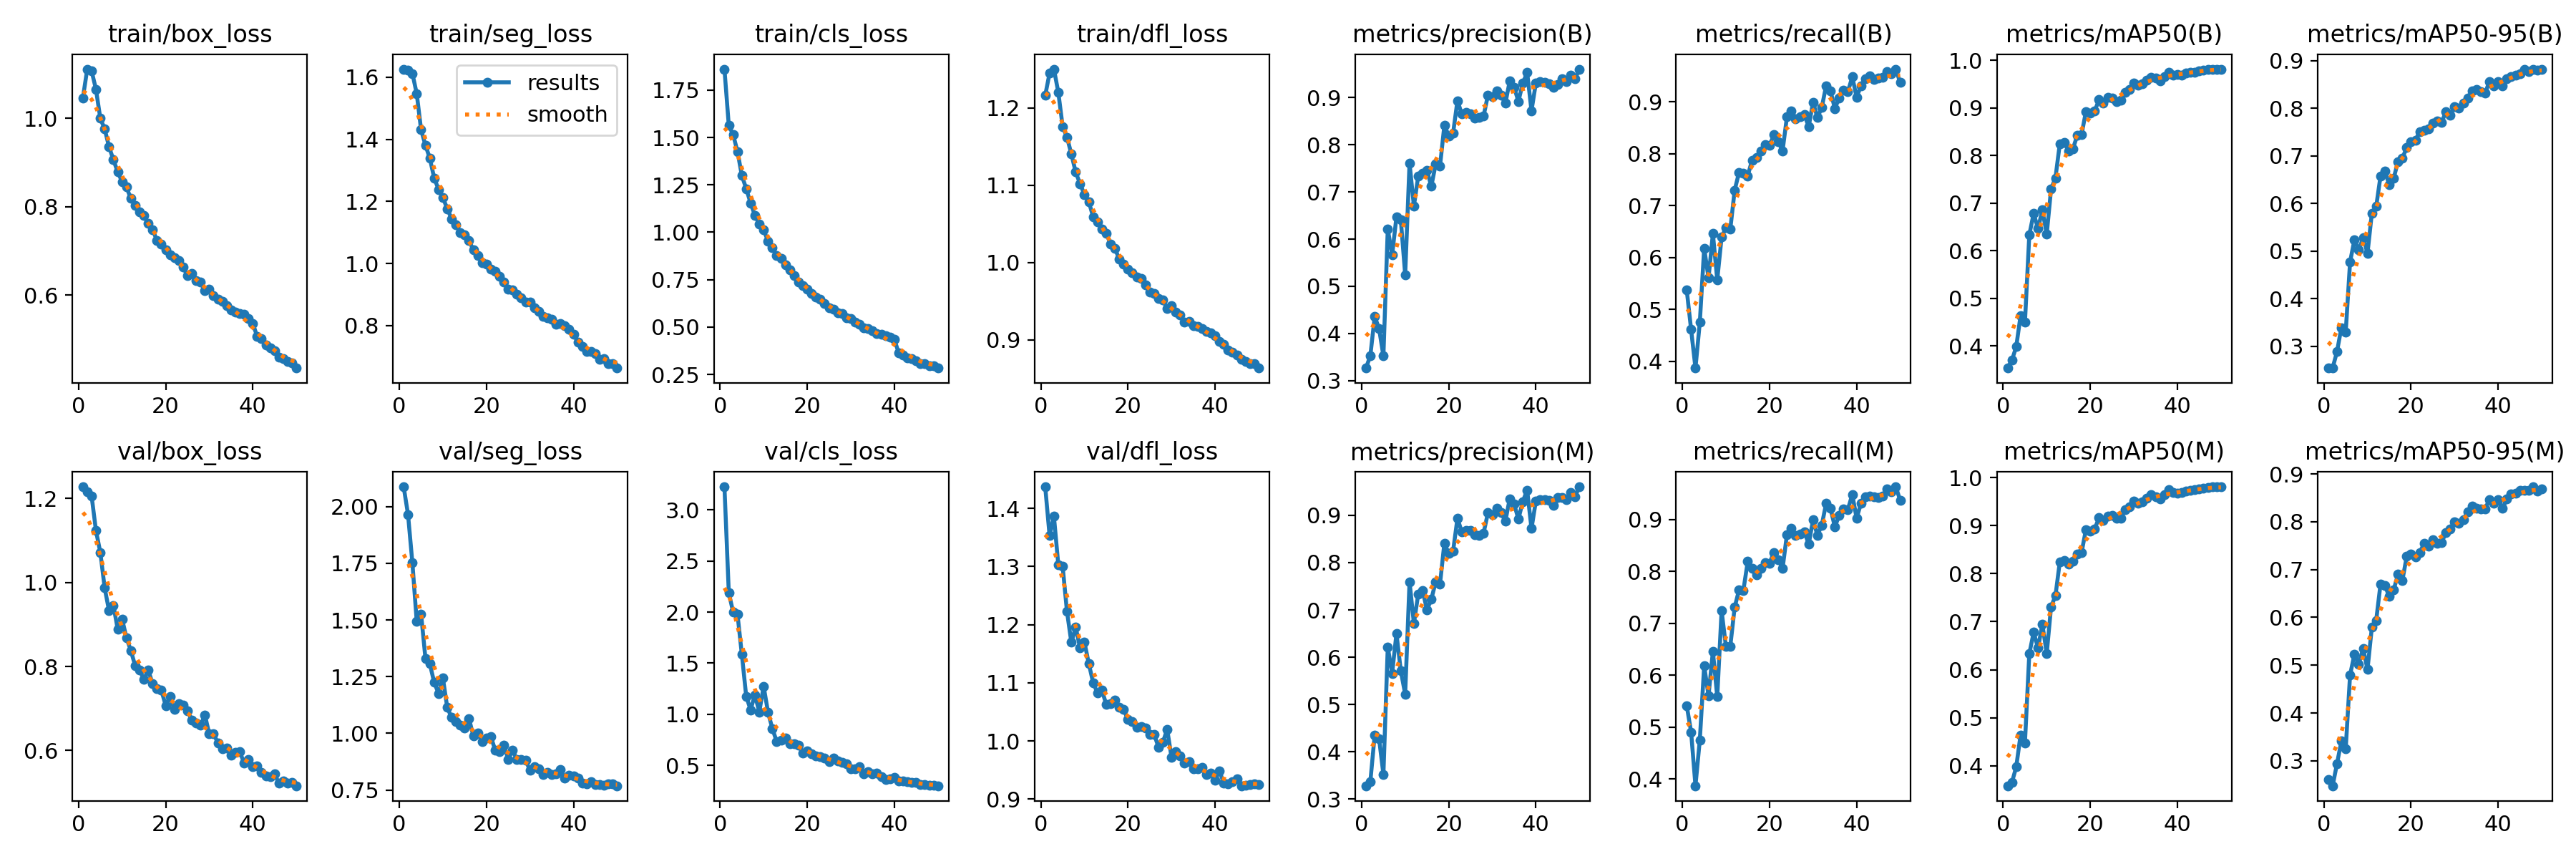

In [16]:
from IPython.display import Image, display
display(Image(filename="/content/runs/segment/train/results.png", width=900))


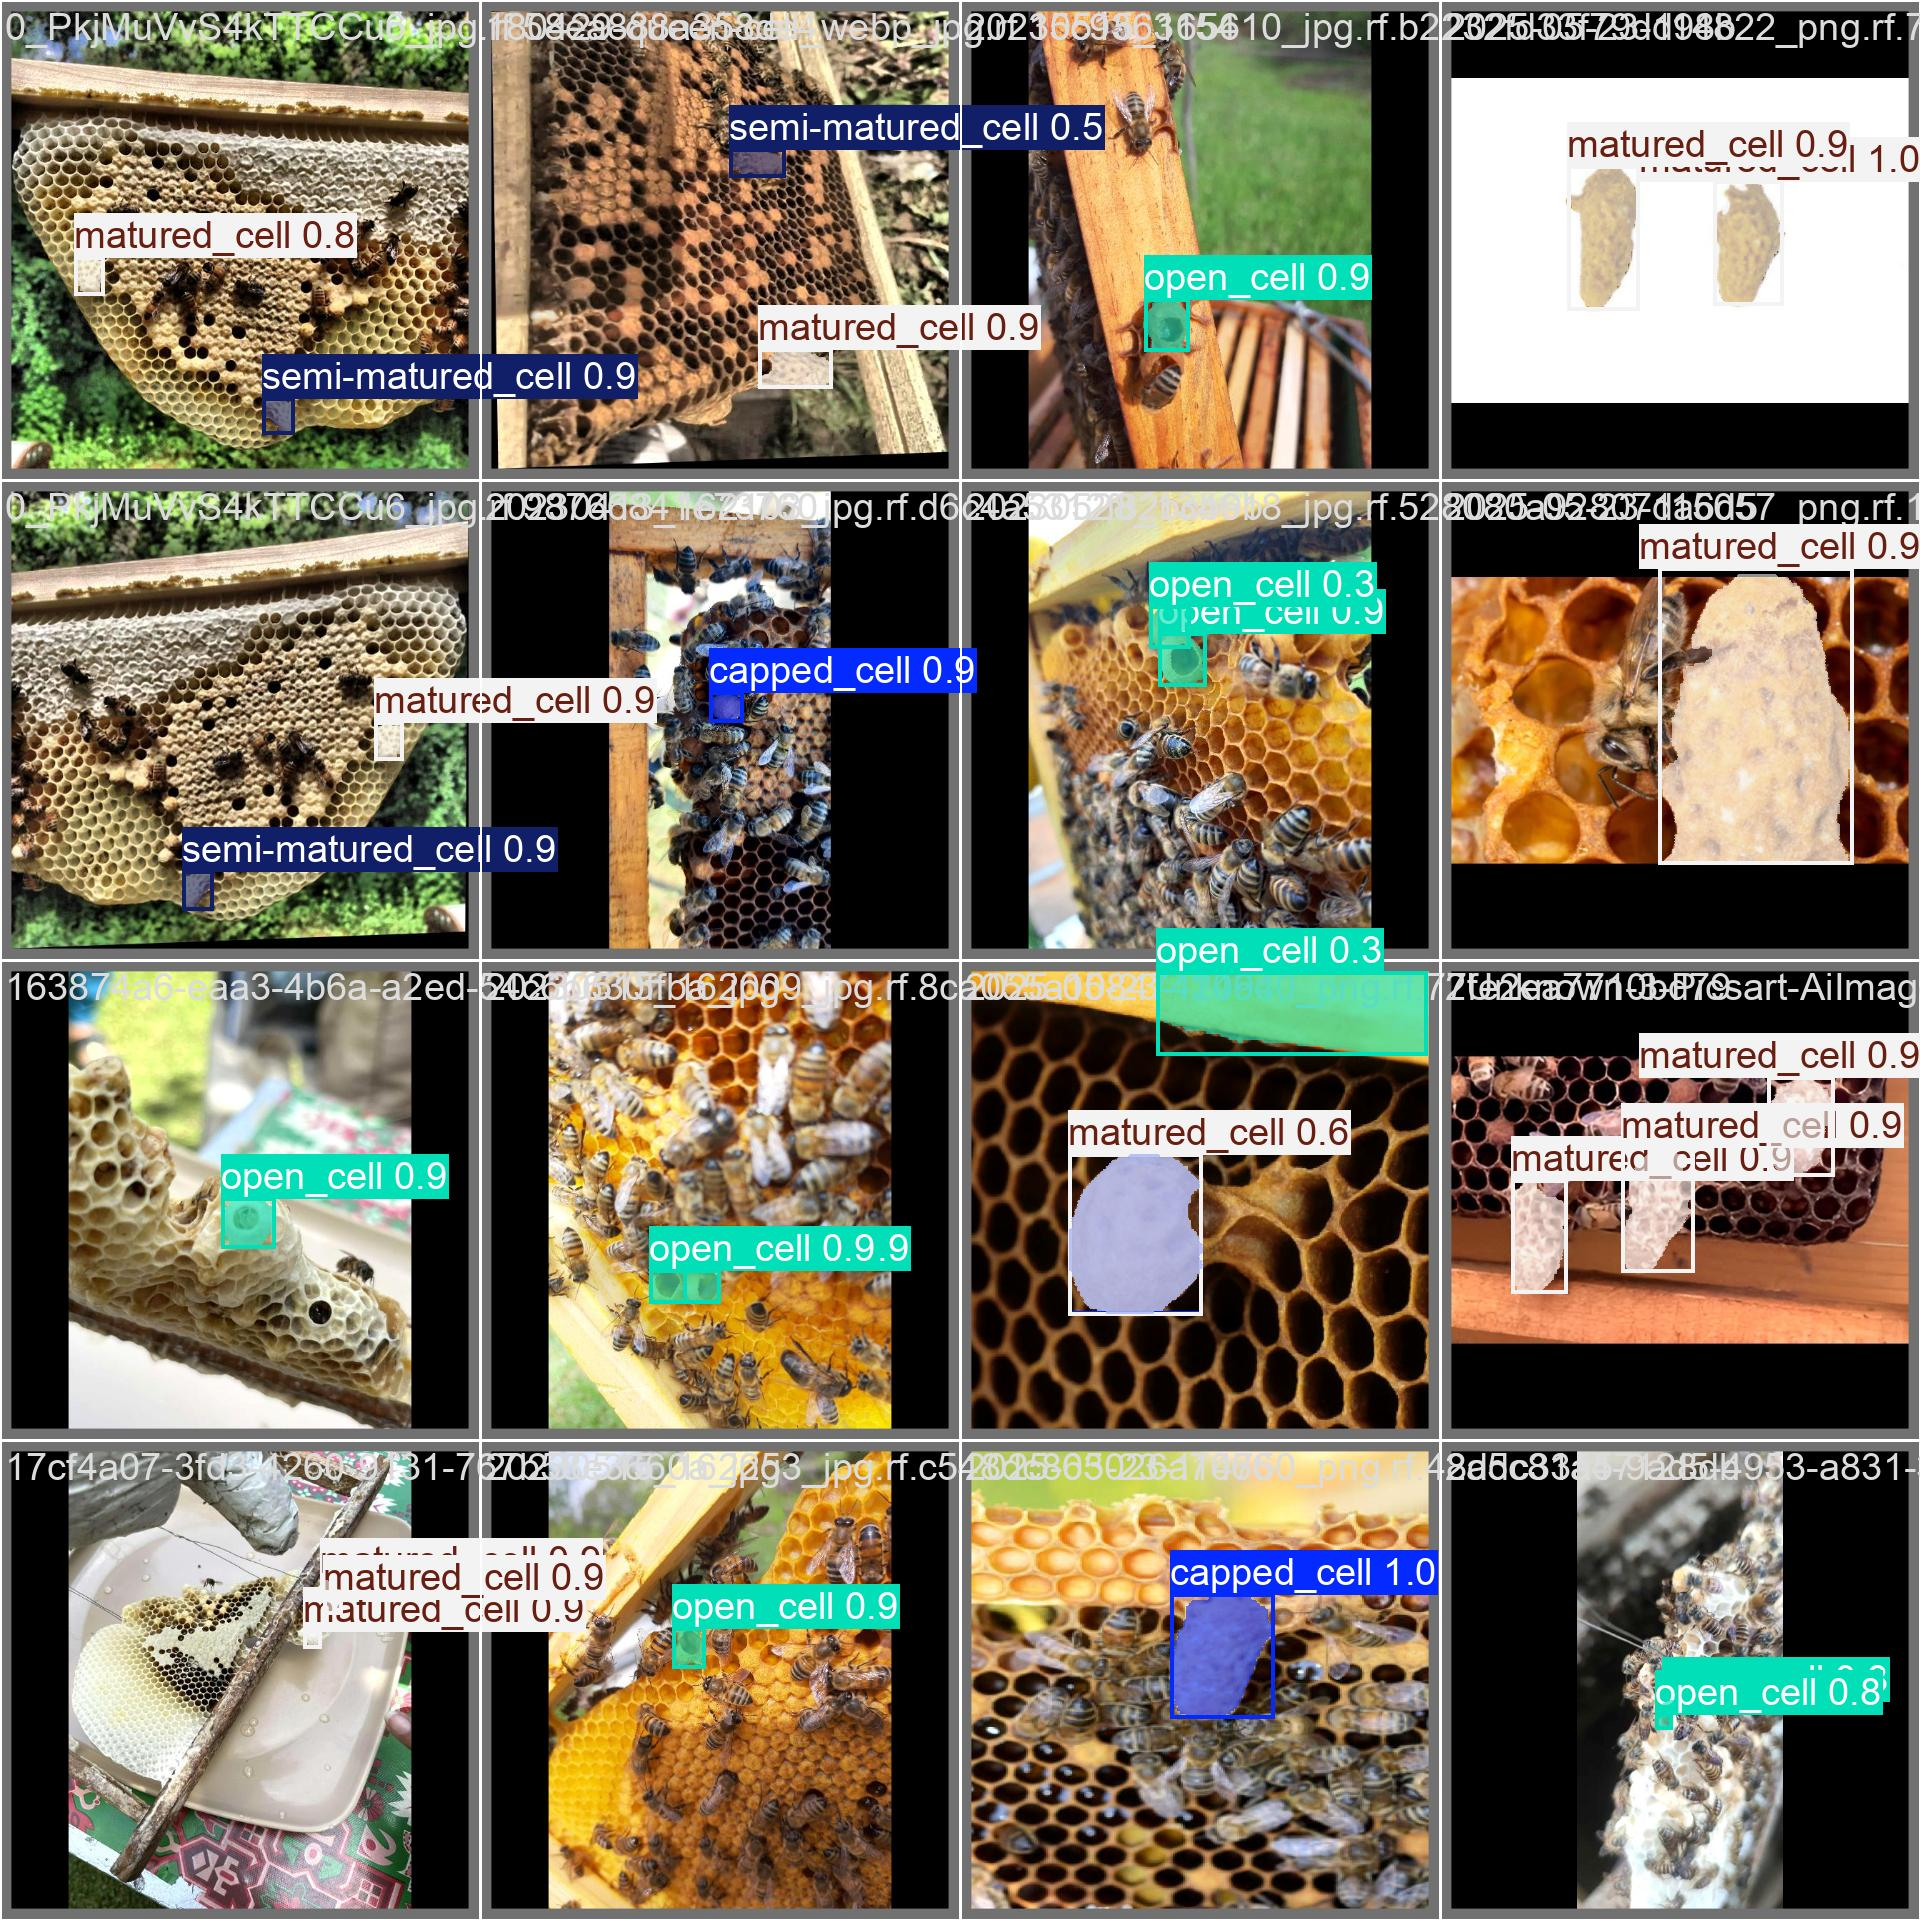

In [17]:
display(Image(filename="/content/runs/segment/train/val_batch0_pred.jpg", width=1700))


# Data Visualization

# Confusion Matrix

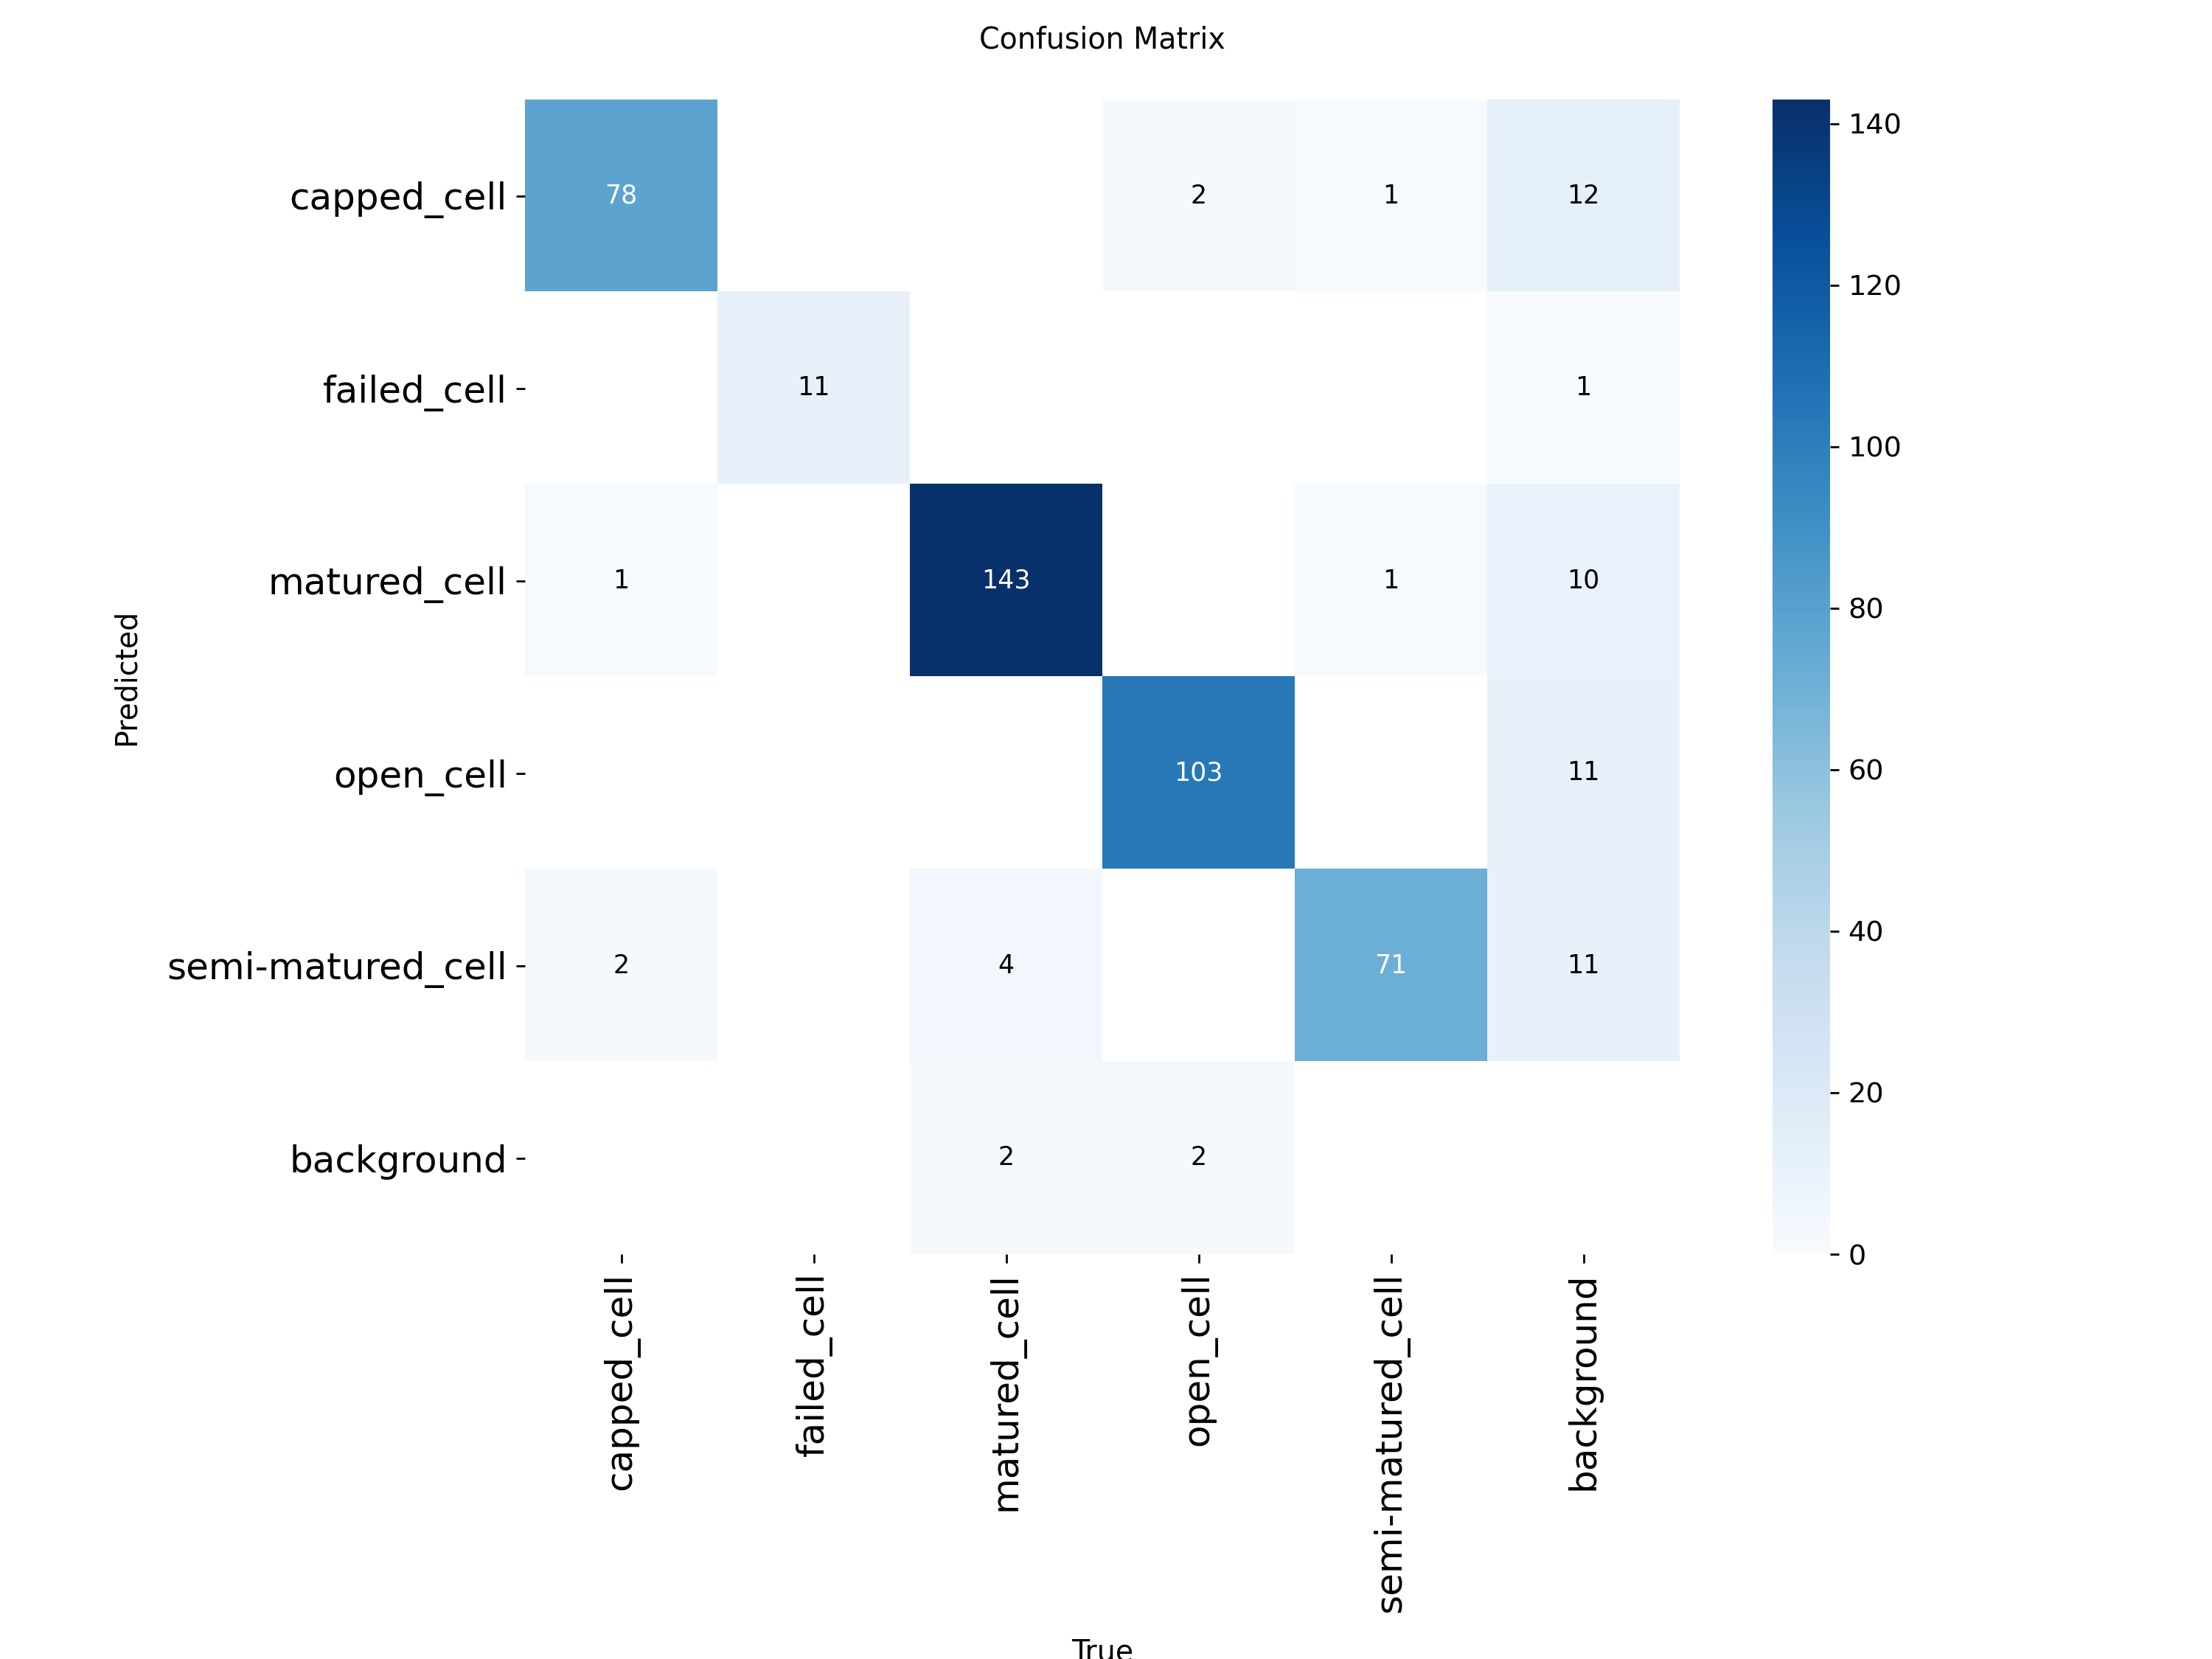

In [52]:
display(Image(filename="/content/runs/segment/train/confusion_matrix.png", width=900))


The confusion matrix shows that the model correctly classifies most queen cell categories with very few misclassifications, reinforcing the high precision and recall metrics reported earlier.

**Key Observations**



*   Strong diagonal values indicate highly accurate predictions across all queen cell stages.
*   Matured cells and open cells have the highest correct classifications (143 and 103 respectively), showing the model is very confident with these classes.
* Failed cells show perfect detection with no false negatives, which is especially valuable since early identification of failed queen cell stages is critical for intervention.
* Capped cells and semi-matured cells display minor confusion, particularly with open cell predictions. This is expected due to their visual similarity in transitional developmental stages and natural variation in comb structure.
* A very small number of predictions fall into background, but these errors are negligible and do not affect model reliability.

**Overall Insight**
* The confusion matrix confirms that the YOLO11-Large model makes highly accurate and consistent predictions across queen cell maturity stages. Misclassifications are minimal and primarily occur between morphologically neighboring classes, which is a normal biological overlap rather than model weakness.

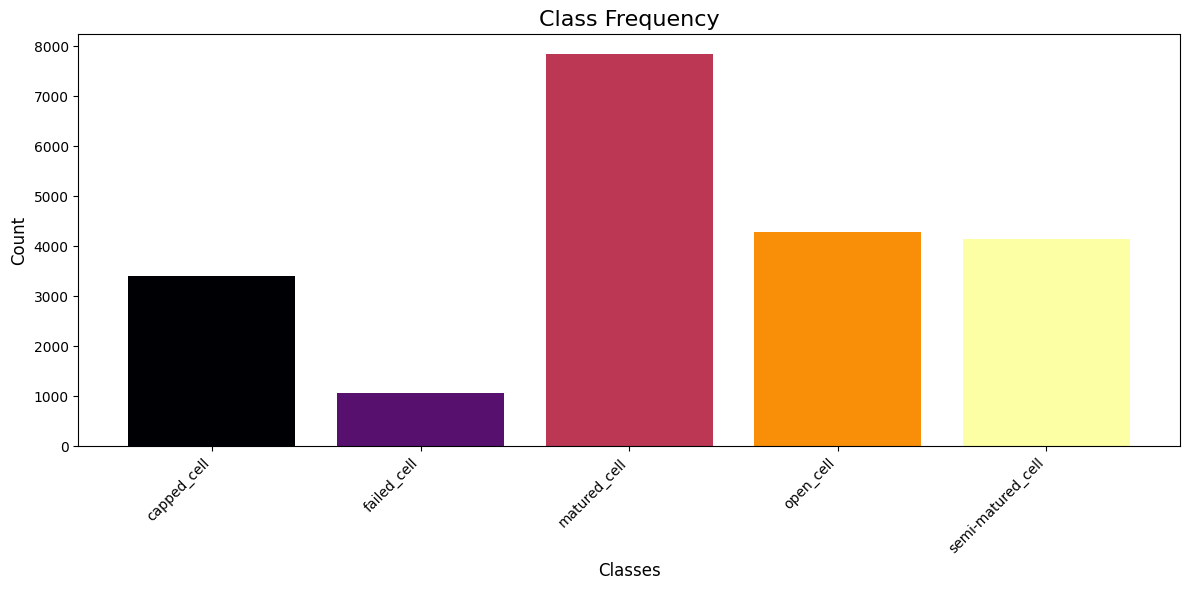

In [24]:
import os
from collections import Counter
import yaml
import matplotlib.pyplot as plt
import numpy as np

labels_dir = "/content/queen-cells-segment-1/train/labels"

counts = Counter()
for file in os.listdir(labels_dir):
    with open(f"{labels_dir}/{file}", "r") as f:
        for line in f.readlines():
            cls = int(line.split()[0])
            counts[cls] += 1

with open("/content/queen-cells-segment-1/data.yaml", "r") as y:
    names = yaml.safe_load(y)["names"]

num_classes = len(names)
colors = plt.cm.inferno(np.linspace(0, 1, num_classes))

plt.figure(figsize=(12, 6))
plt.bar(names, [counts[c] for c in range(num_classes)], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title("Class Frequency", fontsize=16)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


# YOLOv11 Segmentation Training and Validation Loss Curve

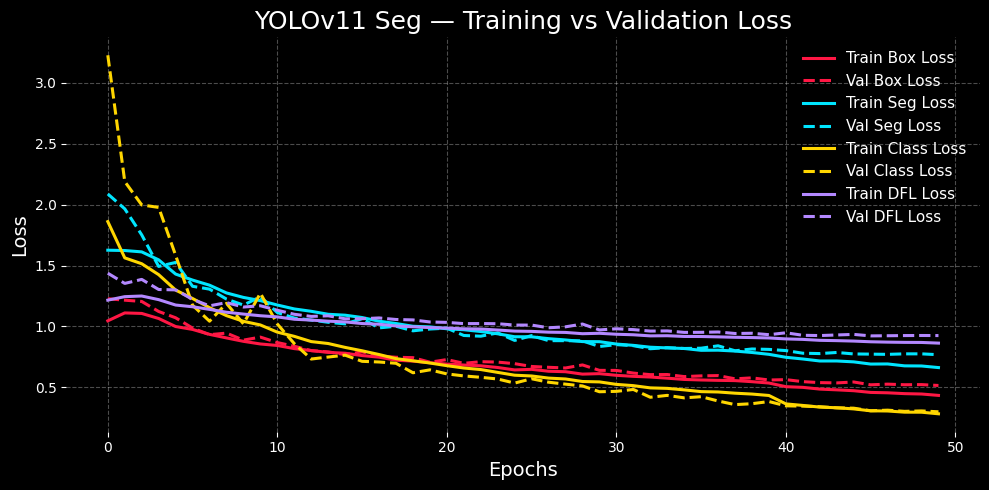

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/runs/segment/train/results.csv")

plt.style.use("dark_background")

plt.figure(figsize=(10,5), facecolor="black")
ax = plt.gca()
ax.set_facecolor("black")

neon_colors = [
    "#FF1744",
    "#00E5FF",
    "#FFD600",
    "#B388FF"
]

plt.plot(df["train/box_loss"], label="Train Box Loss", linewidth=2.2, color=neon_colors[0])
plt.plot(df["val/box_loss"], label="Val Box Loss", linestyle="--", linewidth=2.2, color=neon_colors[0])

plt.plot(df["train/seg_loss"], label="Train Seg Loss", linewidth=2.2, color=neon_colors[1])
plt.plot(df["val/seg_loss"], label="Val Seg Loss", linestyle="--", linewidth=2.2, color=neon_colors[1])

plt.plot(df["train/cls_loss"], label="Train Class Loss", linewidth=2.2, color=neon_colors[2])
plt.plot(df["val/cls_loss"], label="Val Class Loss", linestyle="--", linewidth=2.2, color=neon_colors[2])

plt.plot(df["train/dfl_loss"], label="Train DFL Loss", linewidth=2.2, color=neon_colors[3])
plt.plot(df["val/dfl_loss"], label="Val DFL Loss", linestyle="--", linewidth=2.2, color=neon_colors[3])

plt.title("YOLOv11 Seg — Training vs Validation Loss", fontsize=18, color="white")
plt.xlabel("Epochs", fontsize=14, color="white")
plt.ylabel("Loss", fontsize=14, color="white")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.grid(alpha=0.3, linestyle="--", color="white")
plt.legend(fontsize=11, frameon=False, labelcolor="white", loc="upper right")
plt.tight_layout()
plt.show()


The graph shows that all training and validation losses (box, segmentation, classification, and DFL) steadily decrease, meaning the YOLOv11 model is learning effectively over the epochs. Training and validation lines stay close to each other, showing no major overfitting. The sharp improvements happen early, and the losses gradually flatten toward the end, indicating stable and consistent learning. Overall, the model is improving in object detection, segmentation accuracy, and precision while generalizing well to new data.


# YOLOv11 Segmentation Training Performance Plot showing mAP progression over epochs

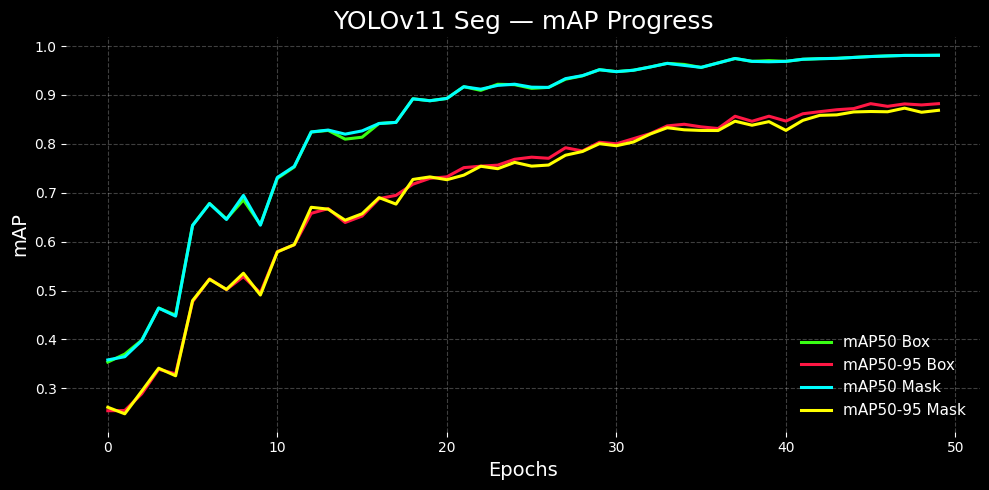

In [101]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

colors = ["#39FF14",
          "#FF1744",
          "#00FFFF",
          "#FFFF00"]

plt.figure(figsize=(10,5), facecolor="black")
ax = plt.gca()
ax.set_facecolor("black")

plt.plot(df["metrics/mAP50(B)"],     label="mAP50 Box",      linewidth=2.2, color=colors[0])
plt.plot(df["metrics/mAP50-95(B)"],  label="mAP50-95 Box",   linewidth=2.2, color=colors[1])
plt.plot(df["metrics/mAP50(M)"],     label="mAP50 Mask",     linewidth=2.2, color=colors[2])
plt.plot(df["metrics/mAP50-95(M)"],  label="mAP50-95 Mask",  linewidth=2.2, color=colors[3])

plt.title("YOLOv11 Seg — mAP Progress", fontsize=18, color="white")
plt.xlabel("Epochs", fontsize=14, color="white")
plt.ylabel("mAP", fontsize=14, color="white")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.grid(alpha=0.25, linestyle="--", color="white")

plt.legend(fontsize=11, frameon=False, labelcolor="white", loc="lower right")

plt.tight_layout()
plt.show()


The graph shows that the YOLOv11 Seg model improves consistently in both detection and segmentation accuracy over the training epochs. All mAP values (mAP50 and mAP50-95 for both box and mask) increase steadily, especially in the early epochs, and then gradually level off as the model stabilizes.

The mask mAP is consistently higher than the box mAP, meaning the model is performing slightly better at segmentation than just bounding box detection. By the final epochs, mAP50 for segmentation is close to 0.98, while mAP50-95 for both box and mask reach around 0.87–0.89, showing strong overall performance.

Overall, the model is learning effectively, with no signs of performance drop or instability, and is achieving high accuracy in both object detection and segmentation.


In [36]:
import glob

print("Train images:", len(glob.glob("/content/queen-cells-segment-1/train/images/*")))
print("Valid images:", len(glob.glob("/content/queen-cells-segment-1/valid/images/*")))
print("Test images:", len(glob.glob("/content/queen-cells-segment-1/test/images/*")))


Train images: 4266
Valid images: 200
Test images: 99


# Learning Curves

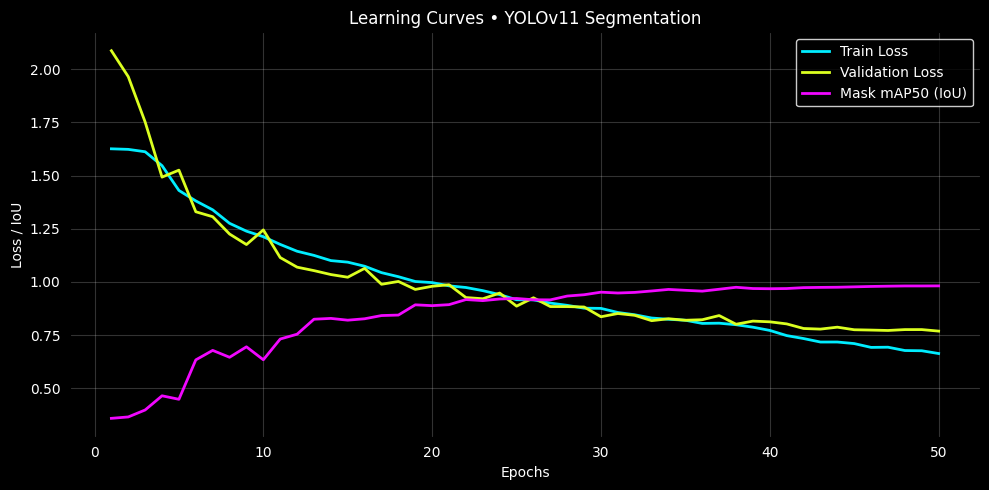

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/runs/segment/train/results.csv")

epochs = df.index + 1

train_loss = df["train/seg_loss"]
val_loss   = df["val/seg_loss"]
mask_iou   = df["metrics/mAP50(M)"]

plt.style.use('default')
cmap = plt.cm.nipy_spectral
colors = [cmap(0.2), cmap(0.5), cmap(0.8)]

plt.figure(figsize=(10,5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

plt.plot(epochs, train_loss, label="Train Loss", color=colors[0], linewidth=2)
plt.plot(epochs, val_loss, label="Validation Loss", color=colors[1], linewidth=2)
plt.plot(epochs, mask_iou, label="Mask mAP50 (IoU)", color=colors[2], linewidth=2)

plt.xlabel("Epochs", color='white')
plt.ylabel("Loss / IoU", color='white')
plt.title("Learning Curves • YOLOv11 Segmentation", color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.grid(alpha=0.2, color='white')
plt.tight_layout()
plt.show()


This YOLOv11 segmentation model trained steadily and effectively over 50 epochs, with both training and validation losses decreasing closely together, indicating good learning and minimal overfitting. Mask mAP50 steadily increased, reaching around 0.98, showing the model achieved high accuracy in segmenting objects

# Model Performance Comparison (FPS vs mAP@50)

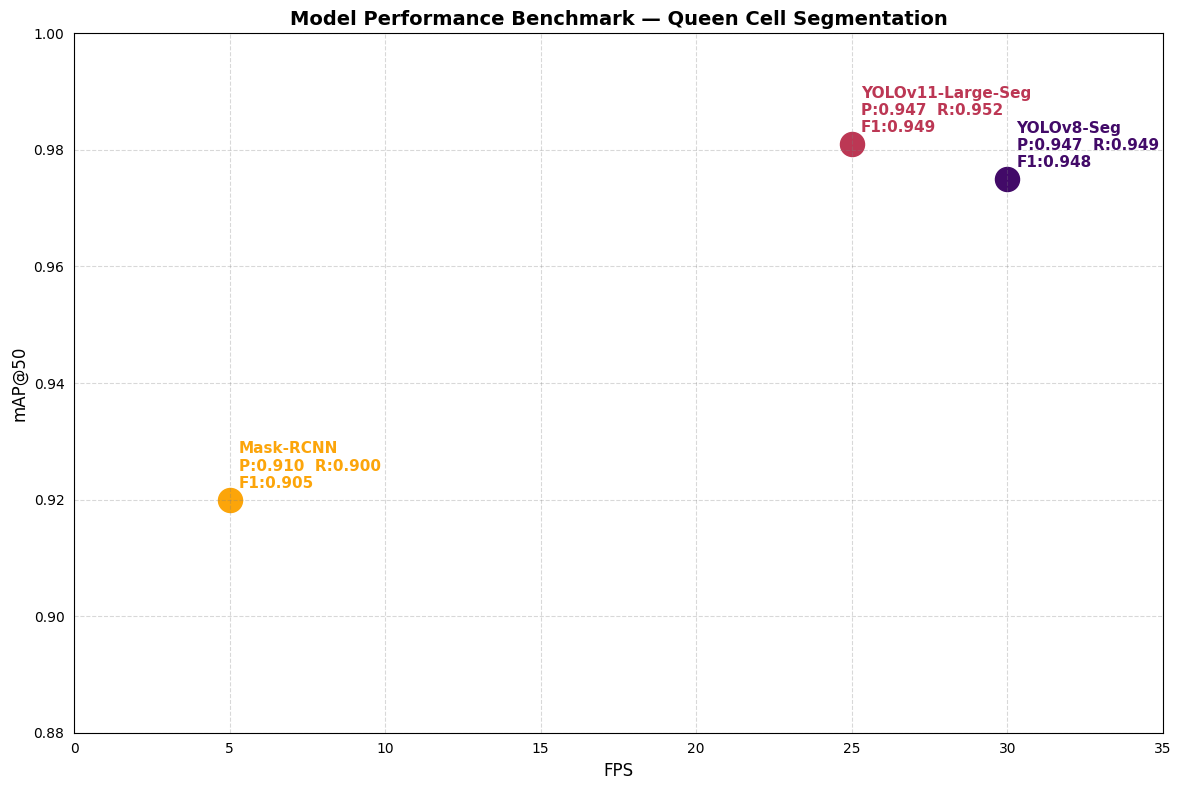

In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

models = ['YOLOv8-Seg', 'YOLOv11-Large-Seg', 'Mask-RCNN']
fps = [30, 25, 5]
map50 = [0.975, 0.981, 0.92]
precision = [0.947, 0.947, 0.91]
recall = [0.949, 0.952, 0.90]
f1 = [0.948, 0.949, 0.905]

colors = plt.cm.inferno(np.linspace(0.2, 0.8, len(models)))

plt.figure(figsize=(12,8))

for i in range(len(models)):
    plt.scatter(fps[i], map50[i], s=300, color=colors[i])
    plt.text(
        fps[i] + 0.3, map50[i] + 0.002,
        f"{models[i]}\nP:{precision[i]:.3f}  R:{recall[i]:.3f}\nF1:{f1[i]:.3f}",
        fontsize=11, weight='bold', color=colors[i]
    )

plt.xlim(0, 35)
plt.ylim(0.88, 1.0)

plt.xlabel("FPS", fontsize=12, color="black")
plt.ylabel("mAP@50", fontsize=12, color="black")
plt.title("Model Performance Benchmark — Queen Cell Segmentation",
          fontsize=14, weight='bold', color="black")

plt.xticks(color='black')
plt.yticks(color='black')

for spine in plt.gca().spines.values():
    spine.set_color('black')

plt.grid(alpha=0.3, linestyle="--", color="gray")
plt.tight_layout()
plt.show()


This chart compares the performance of three segmentation models (YOLOv11-Large-Seg, YOLOv8-Seg, and Mask-RCNN) for queen cell segmentation.

On the y-axis is mAP@50 (mean average precision at 50% IoU threshold), which measures overall detection accuracy. The models with higher mAP@50 perform better.

YOLOv11-Large-Seg and YOLOv8-Seg show nearly identical top performance, both with mAP@50 values around 0.98 and F1 scores around 0.949, meaning they are highly accurate and balanced in precision and recall. Mask-RCNN performs slightly lower, with an mAP@50 of about 0.92 and an F1 score of 0.905, which still indicates good but relatively weaker accuracy compared to the YOLO models.

In summary, YOLOv11-Large-Seg slightly outperforms the others, showing that the latest YOLO version provides a small improvement in precision and recall for this task.
